
<figure>
<center>
<img src='https://cdn.dribbble.com/users/610297/screenshots/6662102/yulu-brand-identity.gif' />
<figcaption>Yulu</figcaption></center>
</figure>




##**About Yulu**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!


##**Problem Statement**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

##**Yulu wants to know**

1.) Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2.) How well those variables describe the electric cycle demands

-----------------
**1** ▶ Import the required Libraries

In [ ]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('bike_sharing.csv')

In [ ]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Exploratory Data Analysis

a. Examine dataset structure, characteristics, and statistical summary.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Shape of the dataset -
print("No. of rows : ", df.shape[0])
print("No. of columns : ", df.shape[1])

No. of rows :  10886
No. of columns :  12


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# checking data types
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Insights 🐾 the datatypes of all columns expect Datetime is integer or float. The Datatime column is a object.

In [ ]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


b. Identify missing values and perform Imputation using an appropriate method.

In [ ]:
#checking null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

After looking at the dataset provided, we can say that there are no null values in the sample provided. So, there is no need of missing value treatment.

c. Identify and remove duplicate records.


In [ ]:
df.duplicated().sum()

0

In [ ]:
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Value counts : ")
  print(df[col_name].value_counts())

In [ ]:
col_list = ['workingday',	'holiday',	'weather', 'season']
for col in col_list:
  print(col, " -")
  dist_check(df, col)
  print("\n")

workingday  -
Unique values :  [0 1]
Value counts : 
workingday
1    7412
0    3474
Name: count, dtype: int64


holiday  -
Unique values :  [0 1]
Value counts : 
holiday
0    10575
1      311
Name: count, dtype: int64


weather  -
Unique values :  [1 2 3 4]
Value counts : 
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


season  -
Unique values :  [1 2 3 4]
Value counts : 
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64




After looking at the dataset provided, we can say that there are duplicate values in the sample provided. So, there is no need of drop duplicate treatment.

Column Profiling:


*  datetime: datetime
*  season: season (1: spring, 2: summer, 3: fall, 4: winter)
*  holiday : whether day is a holiday or not
*  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*  weather:
*    1: Clear, Few clouds, partly cloudy
*    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
        Scattered clouds
*    4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered


##  Univariate Analysis

d. Analyze the distribution of Numerical & Categorical variables, separately


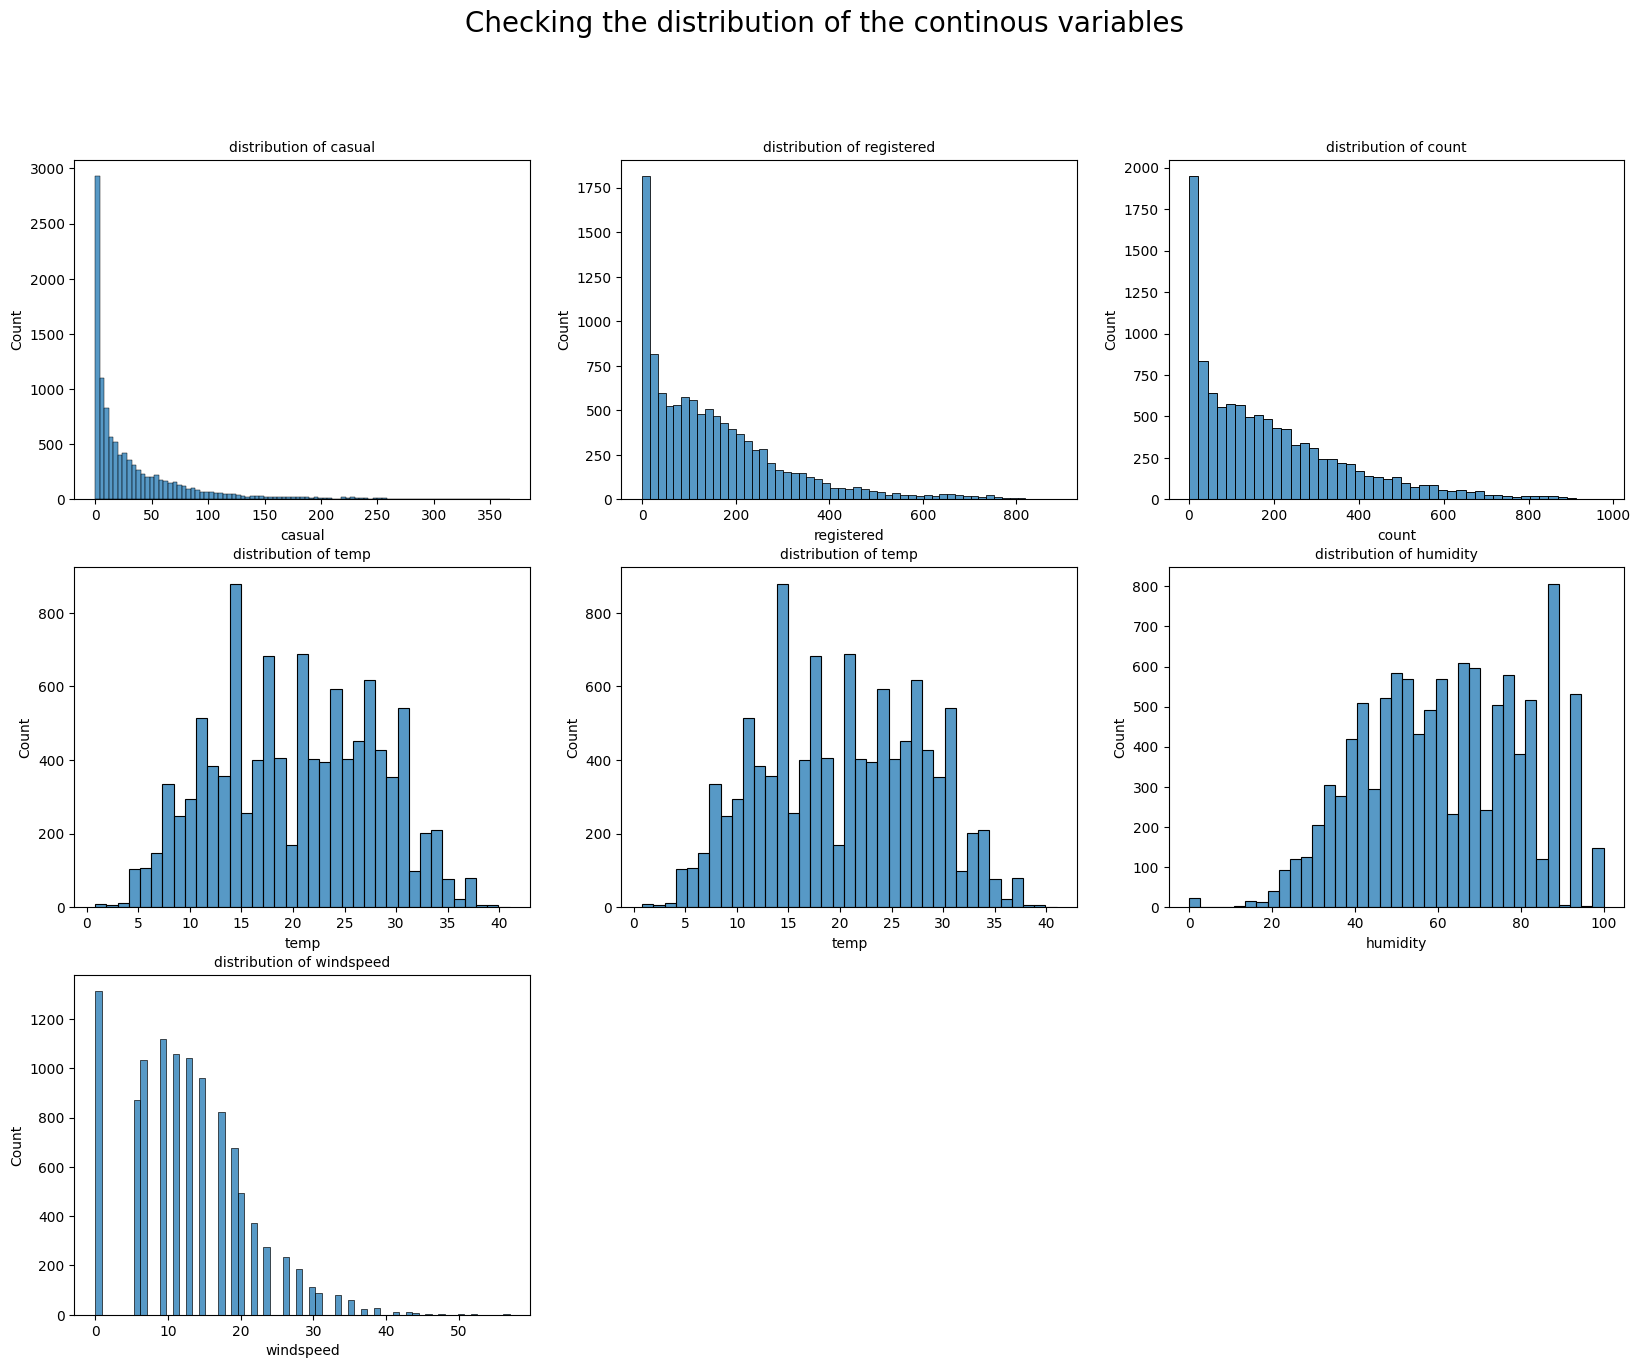

In [ ]:
# Checking the distribution of the continous variables
plt.figure(figsize=(20,15))
plt.suptitle("Checking the distribution of the continous variables",fontsize=20)
plt.subplot(3,3,1)
sns.histplot(df, x = "casual")
plt.title("distribution of casual",fontsize=10)

plt.subplot(3,3,2)
sns.histplot(df, x = "registered")
plt.title("distribution of registered",fontsize=10)

plt.subplot(3,3,3)
sns.histplot(df, x = "count")
plt.title("distribution of count",fontsize=10)

plt.subplot(3,3,4)
sns.histplot(df, x = "temp")
plt.title("distribution of temp",fontsize=10)

plt.subplot(3,3,5)
sns.histplot(df, x = "temp")
plt.title("distribution of temp",fontsize=10)

plt.subplot(3,3,6)
sns.histplot(df, x = "humidity")
plt.title("distribution of humidity",fontsize=10)

plt.subplot(3,3,7)
sns.histplot(df, x = "windspeed")
plt.title("distribution of windspeed",fontsize=10)

plt.show()


* registered and total rides looks RIGHT SKEWED.
  This data needs to be treated. We can try taking log of the same and check if it forms log normal distribution or not.
* temp, atemp and humidity looks normally distributed but we need to apply proper checks to it before reaching the conclusion.
* Windspeed looks right skewed, if there is less windspeed then more rides are happening. This data also needs to be checked for normality by taking log.

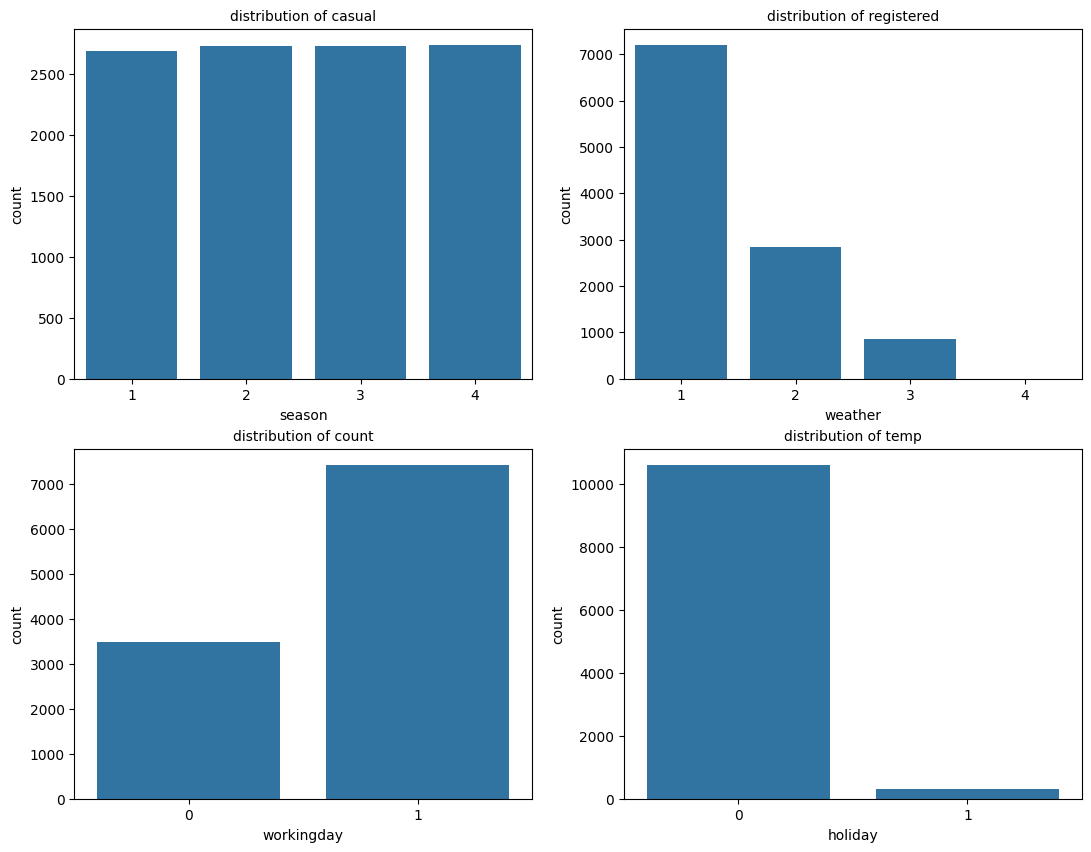

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data = df, x = "season")
plt.title("distribution of casual",fontsize=10)

plt.subplot(2,2,2)
sns.countplot(data = df, x = "weather")
plt.title("distribution of registered",fontsize=10)

plt.subplot(2,2,3)
sns.countplot(data = df, x = "workingday")
plt.title("distribution of count",fontsize=10)

plt.subplot(2,2,4)
sns.countplot(data = df, x = "holiday")
plt.title("distribution of temp",fontsize=10)

plt.show()


*  A count plot for season shows that alll seasons have same distribution of bike rides. There is no prefered season as such.
* We can say that weather is considerably one of the factors affecting bike rides. When the weather is Clear, Few clouds, partly cloudy, partly cloudy there are more rides while when the weather is Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow or Fog then hardly any rides are booked.
* On working day, people prefer taking rides more than non working days .
* On holidays, people don't seem to use the services much .


e. Check for Outliers and deal with them accordingly.


## Bivariate Analysis

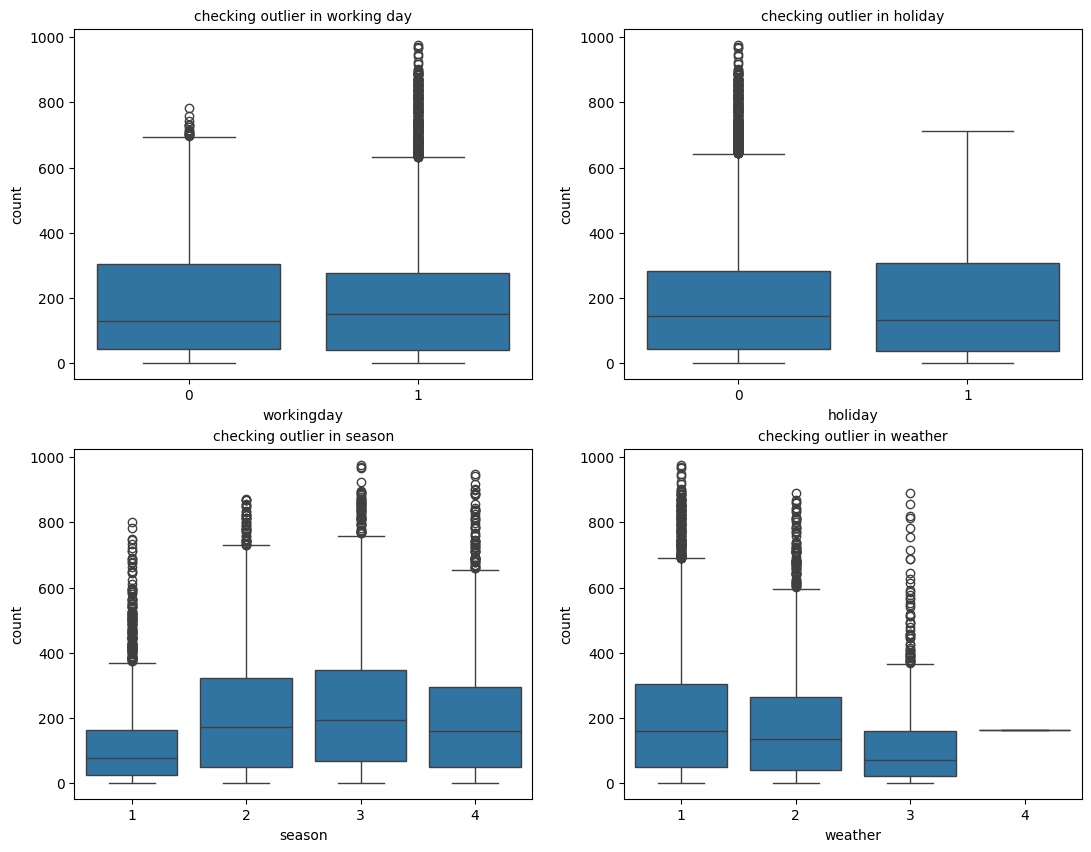

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, x = "workingday", y ="count")
plt.title("checking outlier in working day",fontsize=10)

plt.subplot(2,2,2)
sns.boxplot(data = df, x = "holiday", y ="count")
plt.title("checking outlier in holiday",fontsize=10)

plt.subplot(2,2,3)
sns.boxplot(data = df, x = "season", y ="count")
plt.title("checking outlier in season",fontsize=10)

plt.subplot(2,2,4)
sns.boxplot(data = df, x = "weather", y ="count")
plt.title("checking outlier in weather",fontsize=10)

plt.show()

* The median of working day and non working day seem almost similar.
   There are more outliers on the working day.
* The median of holiday and non holiday seem almost similar.
  There are more outliers on non holiday.
  We can say that the holiday column and working day column are vice versa.
* The medians of season 2 - Summer and 3 - Fall is little bit more than 4 -
  Winter. The least median is of 1 - Spring.
   All the seasons are seeing some outliers.

* Looking at the weather and bike ride relationship, the adverse weather 4 -    Heavy rains is expected to see least bike ride bookings while weather 1  
clear weather and 2 - Mist and cloudy have similar medians.

     The median of weather 3 - Light snow, rain is little lower than the 1st and 2nd weather.

. Remove/Clip existing outliers as necessary.


In [ ]:
# unique values in each column
for i in df.columns:
  print(i,' : ',df[i].nunique())


datetime  :  10886
season  :  4
holiday  :  2
workingday  :  2
weather  :  4
temp  :  49
atemp  :  60
humidity  :  89
windspeed  :  28
casual  :  309
registered  :  731
count  :  822


In [ ]:
# # 3.
# # Outlier Treatment using IQR (not needed but, we can do it) -

#q1 = df['count'].quantile(0.25)
#q3 = df['count'].quantile(0.75)
#iqr = q3-q1

#df = df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]

#print("No. of rows : ", df.shape[0])

Outlier treatment using np.clip()

In [ ]:
df_copy = df.copy()

# cliping the data np.clip() between the 5 percentile and 95 percentile
cols=['workingday','holiday','season','weather']
for col in cols:

  percentile = df_copy[col].quantile([0.05,0.95]).values
  df_copy[col] = np.clip(df_copy[col], percentile[0], percentile[1])
print("No. of rows : ", df_copy.shape[0])

No. of rows :  10886




---

## **2.** Try establishing a Relationship between the Dependent and Independent Variables.


i. Plot a Correlation Heatmap and draw insights.


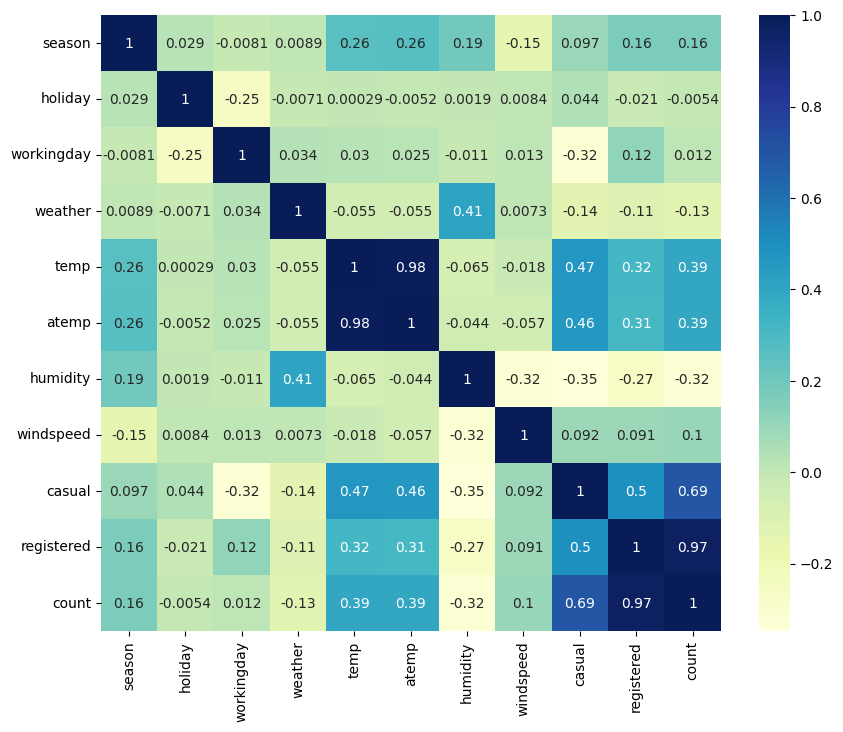

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

Insights 🐾 **The positive value of correlation between Temprature and Count indicate that bicycle rentals sligthly depend on temperature also.**
--
from the correlation we can verify some logical points:
- feeling temperature or aparent temprature and temp are highly correlated, because they are most of the times approximately the same have a very small diffrerence
- count, causal, registered are all correlated to each other because all of them

In [ ]:
# Dropping highly correlated columns -
dfn = df.drop(columns=['casual', 'registered', 'atemp'])
dfn.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1


Aggregating the total no. of bike rides based on the given factors -

In [ ]:
# 1. Workingday -
pd.DataFrame(dfn.groupby('workingday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
# 2. Holiday -
pd.DataFrame(dfn.groupby('holiday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [ ]:
# 3. Season -
pd.DataFrame(dfn.groupby('season')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
# 4. Weather -
pd.DataFrame(dfn.groupby('weather')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0




---


## 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?


**Hypothesis Testing**


a.)  Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1) :

        Ho : Working day has no effect on the number of electric cycles rented

        Ha: Working day has an effect

b.)  Select an appropriate test -

      2- Sample T-Test

**Scenario 1: Working day effect**

In [ ]:
df_working_day = df[dfn["workingday"] == 1]
mean_working_day = df_working_day["count"].mean()

df_non_working_day = df[dfn["workingday"] == 0]
mean_non_working_day = df_non_working_day["count"].mean()

print("Mean of Working day :", mean_working_day)
print("Mean of Non Working day :", mean_non_working_day)

Mean of Working day : 193.01187263896384
Mean of Non Working day : 188.50662061024755


**c. Set a significance level** ▶
Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented

Right Tailed test : Mean of working day greater than mean of non working day is tested

d. Calculate test Statistics / p-value

In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp
alpha =0.05
t_stat, p_val = ttest_ind(df_working_day["count"], df_non_working_day["count"], alternative = "greater")

print(f'Test_statistic :{t_stat}, p-value : {p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Test_statistic :1.2096277376026694, p-value : 0.11322402113180674
Fail to Reject Null Hypothesis


e. Decide whether to accept or reject the Null Hypothesis.


Insights ▶        
            Result of ttest on Working day data - The slight difference in mean
           is not significant to reject the Null Hypothesis.
So, we Fail to Reject H0 and believe that the rides on working day and non working day are similar.

**Scenario 2 : Holiday Effect**

Ho : Holiday has no effect on the number of electric cycles rented

Ha: Holiday has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented

In [ ]:
df_holiday = df[df["holiday"] == 1]
mean_holiday = df_holiday["count"].mean()

df_non_holiday = df[dfn["holiday"] == 0]
mean_non_holiday = df_non_holiday["count"].mean()

print("Mean of Holiday :", mean_holiday)
print("Mean of Non Holiday :", mean_non_holiday)

Mean of Holiday : 185.87781350482314
Mean of Non Holiday : 191.7416548463357


In [ ]:


t_stat, p_val = ttest_ind(df_holiday["count"], df_non_holiday["count"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

-0.5626388963477119 0.7131538058364448
Fail to Reject Null Hypothesis


**Insights ▶ :** Result of ttest on Holiday data - The slight difference in mean is not significant to reject the Null Hypothesis.

So, we Fail to Reject H0 and believe that the rides on holiday and a non holiday are similar.



---
## 4. Check if the demand of bicycles on rent is the same for different Weather conditions?



a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
 Scenario 1 : Weather Effect

 Ho : Weather has no effect on the number of electric cycles rented

 Ha: Weather has an effect

 Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
df_weather_1 = df[dfn["weather"] == 1]
mean_weather_1 = df_weather_1["count"].mean()

df_weather_2 = df[dfn["weather"] == 2]
mean_weather_2 = df_weather_2["count"].mean()

df_weather_3 = df[dfn["weather"] == 3]
mean_weather_3 = df_weather_3["count"].mean()

df_weather_4 = df[dfn["weather"] == 4]
mean_weather_4 = df_weather_4["count"].mean()

print("Mean of Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) :", mean_weather_1)
print("Mean of Weather 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) :", mean_weather_2)
print("Mean of Weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) :", mean_weather_3)
print("Mean of Weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) :", mean_weather_4)

Mean of Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) : 205.23679087875416
Mean of Weather 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) : 178.95553987297106
Mean of Weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) : 118.84633294528521
Mean of Weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) : 164.0


b. Select an appropriate test -

Performing ANOVA test to check if No. of cycles rented is similar or different in-
   Different Weather and
   Different Season

In [ ]:
alpha=0.05

f_stat, p_val = f_oneway(df_weather_1["count"], df_weather_2["count"], df_weather_3["count"], df_weather_4["count"])

print(f'test statistic : {f_stat}, p-value : {p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

test statistic : 65.53024112793271, p-value : 5.482069475935669e-42
Reject Null Hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all weathers is same.

Insights ▶ **We can strongly say that Weather has a extreme effect on number of bicycles rented.**

c. Check assumptions of the test

i. Normality : Checking if the Weather data is Gaussian or not

<Axes: xlabel='count', ylabel='Count'>

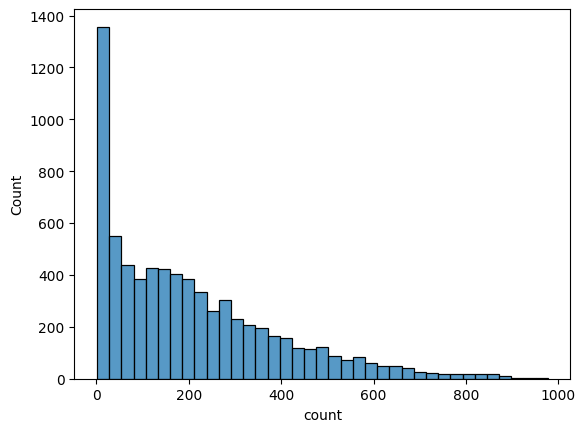

In [ ]:
from scipy.stats import norm
from scipy.stats import shapiro, kstest
from statsmodels.graphics.gofplots import qqplot

sns.histplot(df_weather_1, x = "count")

As per histplot , our data is right skewed

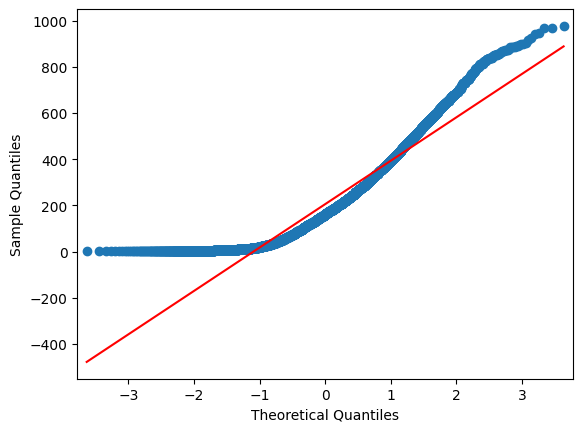

In [ ]:
qqplot(df_weather_1["count"], line = "s")
plt.show()

According to qq plot data is not gaussian , its not normal distribution.

**Shapiro - wilk test**

In [ ]:
#Ho: Data is Gaussian

# Ha: Data is not Gaussion
weather_1_subset = df_weather_1["count"].sample(100)

test_stat, p_val = shapiro(weather_1_subset)

print(f'test_statistics :{test_stat}, p-value :  {p_val}')


if(p_val < 0.05):
  print("Reject Null Hypothesis")
  print('Data is not Gaussian')
else:
  print("Fail to Reject Null Hypothesis")
  print('Data is Gausian')

test_statistics :0.88890540599823, p-value :  4.4084444539294054e-07
Reject Null Hypothesis
Data is not Gaussian


According to the Shapiro test, Weather data provided is not Gaussian.

**KS test**

In [ ]:
# Ho: Data is Gaussian

# Ha: Data is not Gaussian
test_stat, p_val = kstest(weather_1_subset, norm.cdf, args=(weather_1_subset.mean(), weather_1_subset.std()))

print(f'test_statistics : {test_stat}, p-value : {p_val}')

if(p_val < 0.05):
  print("Reject Null Hypothesis")
  print('Data is not Gaussian')
else:
  print("Fail to Reject Null Hypothesis")
  print('Data is Gaussian')

test_statistics : 0.14809866006852263, p-value : 0.02226894237989497
Reject Null Hypothesis
Data is not Gaussian


According to the KS test, Weather data provided is not Gaussian.

**Weather 2**

<Axes: xlabel='count', ylabel='Count'>

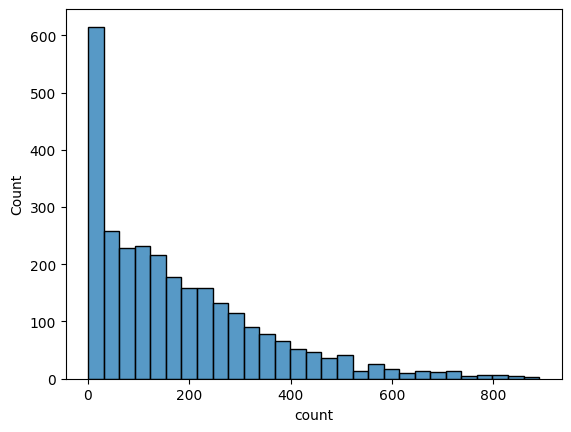

In [ ]:
sns.histplot(df_weather_2, x = "count")

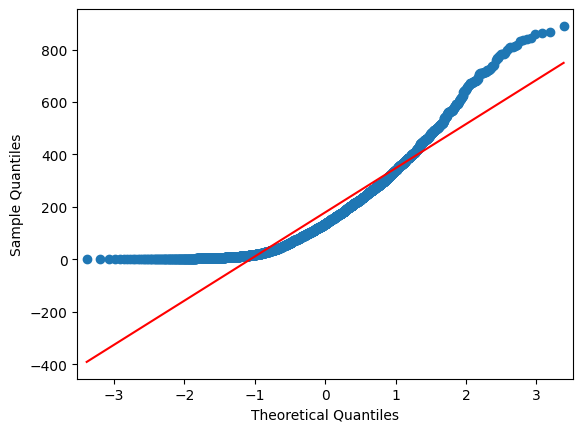

In [ ]:
qqplot(df_weather_2["count"], line = "s")
plt.show()

**Shapiro - wilk test**

In [ ]:
# Ho: Data is Gaussian

# Ha: Data is not Gaussian
alpha=0.05
weather_2_subset = df_weather_2["count"].sample(100)

test_stat, p_val = shapiro(weather_2_subset)

print(f'test_statistics : {test_stat}, p-value :{p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
  print('Data is not Gaussian')
else:
  print("Fail to Reject Null Hypothesis")
  print('Data is Gaussian.')

test_statistics : 0.8845442533493042, p-value :2.840197055320459e-07
Reject Null Hypothesis
Data is not Gaussian


According to shapiro wilk test , our data is not Gaussian ,means its not normal distribution.

**KS-test**

In [ ]:
# Ho: Data is Gaussian

# Ha: Data is not Gaussian
alpha=0.05

test_stat, p_val = kstest(weather_2_subset, norm.cdf, args=(weather_2_subset.mean(), weather_2_subset.std()))

print(f'test statistics :{test_stat}, p-value :  {p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
  print("Data is not Gaussian")
else:
  print("Fail to Reject Null Hypothesis")
  print("Data is Gaussian.")

test statistics :0.13524012794547197, p-value :  0.046783790282540476
Reject Null Hypothesis
Data is not Gaussian


**Insights ▶** After applying Qqplot, Shapiro test and KS test, Weather 2 data still doesn't follow Gaussian.



---
**Boxcox**

To solve this problem, using Boxcox over the sample data of weather 2


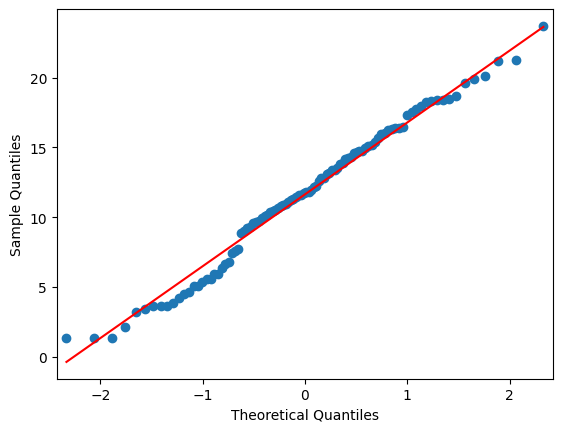

In [ ]:

from scipy.stats import boxcox

transformed_data_weather_2 = boxcox(weather_2_subset)[0]

qqplot(transformed_data_weather_2, line = "s")
plt.show()


In [ ]:
# shapiro wilk test
alpha=0.05
test_stat, p_val = shapiro(transformed_data_weather_2)

print(f'test statitic :{test_stat}, p-value : {p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

test statitic :0.9816623330116272, p-value : 0.17875242233276367
Fail to Reject Null Hypothesis


In [ ]:
#KS test
alpha=0.05
test_stat, p_val = kstest(transformed_data_weather_2, norm.cdf, args=(transformed_data_weather_2.mean(), transformed_data_weather_2.std()))

print(f'test statistic : {test_stat}, p-value : {p_val}')

if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

test statistic : 0.06575899214048248, p-value : 0.7549710561916267
Fail to Reject Null Hypothesis


**Conclusion :** If one test says that the data is Gaussian then we continue to believe that the data is Gaussian. Here, the transformed data now follows Gaussian distribution.

Weather 3

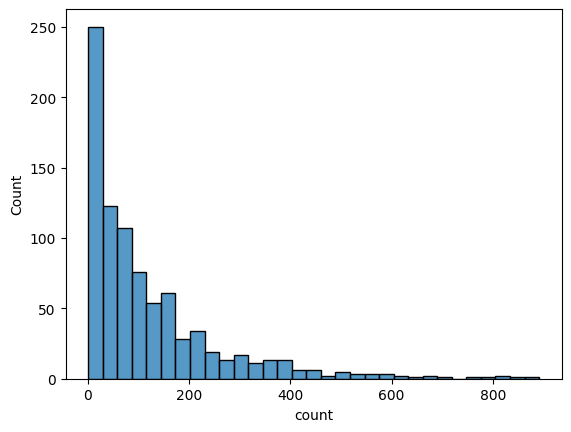

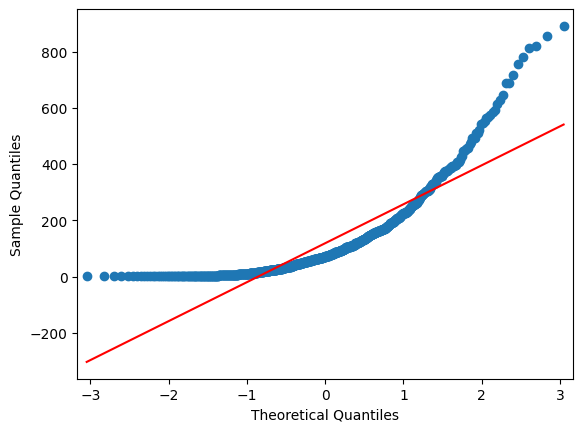

Shapiro Test: 
test statistic value :0.8184628486633301, p-value :  9.522266308792382e-10
Reject Null Hypothesis
----------------------------------------------------------------------------------------------------
KS Test: 
test statistics : 0.17963838757456302, p-value : 0.0027008990075174655
Reject Null Hypothesis


In [ ]:

sns.histplot(df_weather_3, x = "count")


qqplot(df_weather_3["count"], line = "s")
plt.show()
weather_3_subset = df_weather_3["count"].sample(100)


test_stat, p_val = shapiro(weather_3_subset)

print("Shapiro Test: ")
print(f'test statistic value :{test_stat}, p-value :  {p_val}')


if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")
test_stat, p_val = kstest(weather_3_subset, norm.cdf, args=(weather_3_subset.mean(), weather_3_subset.std()))

print("--" * 50)
print("KS Test: ")
print(f'test statistics : {test_stat}, p-value : {p_val}')


if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


Weather 3 follows same pattern as weather 2. The data is not Gaussian.

Applying boxcox to make it Gaussian.

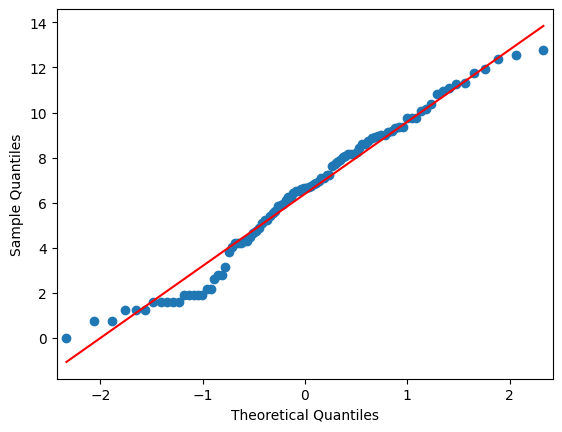

Shapiro Test: 
test statistics : 0.9712809324264526, p-value : 0.027727065607905388
Reject Null Hypothesis
----------------------------------------------------------------------------------------------------
KS test: 
test statitics : 0.08569518523106606, p-value : 0.43085087587346305
Fail to Reject Null Hypothesis


In [ ]:
from scipy.stats import boxcox

alpha=0.05
transformed_data_weather_3 = boxcox(weather_3_subset)[0]


qqplot(transformed_data_weather_3, line = "s")
plt.show()
test_stat, p_val = shapiro(transformed_data_weather_3)

print("Shapiro Test: ")
print(f'test statistics : {test_stat}, p-value : {p_val}')


if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")
test_stat, p_val = kstest(transformed_data_weather_3, norm.cdf, args=(transformed_data_weather_3.mean(), transformed_data_weather_3.std()))

print("--"*50)
print("KS test: ")
print(f'test statitics : {test_stat}, p-value : {p_val}')


if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

**After applying boxcox for Weather 3, the data is now transformed to Gaussian distribution**



---
5. Check if the demand of bicycles on rent is the same for different Seasons?


---




Ho : Season has no effect on the number of electric cycles rented

Ha: Season has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented


In [ ]:

df_season_1 = df[dfn["season"] == 1]
mean_season_1 = df_season_1["count"].mean()

df_season_2 = df[dfn["season"] == 2]
mean_season_2 = df_season_2["count"].mean()

df_season_3 = df[dfn["season"] == 3]
mean_season_3 = df_season_3["count"].mean()

df_season_4 = df[dfn["season"] == 4]
mean_season_4 = df_season_4["count"].mean()

print("Mean of season 1 (Spring) :", mean_season_1)
print("Mean of season 2 (Summer) :", mean_season_2)
print("Mean of season 3 (Fall) :", mean_season_3)
print("Mean of season 4 (Winter) :", mean_season_4)

Mean of season 1 (Spring) : 116.34326135517499
Mean of season 2 (Summer) : 215.25137211855105
Mean of season 3 (Fall) : 234.417124039517
Mean of season 4 (Winter) : 198.98829553767374


In [ ]:
from scipy.stats import f_oneway
alpha =0.05
f_stat, p_val = f_oneway(df_season_1["count"], df_season_2["count"], df_season_3["count"], df_season_4["count"])

print(f_stat, p_val)

if(p_val < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

236.94671081032106 6.164843386499654e-149
Reject Null Hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all seasons is same.

**We can strongly say that Seasons have an extreme effect on number of bicycles rented.**



---



---
## 6. Check if the Weather conditions are significantly different during different Seasons?


a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

          Ho : Weather is not dependent on Season
          Ha: Weather is dependent on Season

b. Select an appropriate test

           Chi-square test


c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns


In [ ]:
weather_season = pd.crosstab(index = dfn["weather"], columns = df["season"], margins= True)
weather_season

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


d. Set a significance level and Calculate the test Statistics / p-value

        Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
 #    H0 : Weather is not dependent on Season
  #    Ha: Weather is dependent on Season
alpha =0.05
from scipy.stats import chi2_contingency
chi_stat, p_val, dof, expected = chi2_contingency(weather_season)

print(f'chi-stats value : {chi_stat}, p-value :  {p_val}, degree of freedom : {dof}, expected value: {expected}')

if(p_val <alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

chi-stats value : 49.15865559689363, p-value :  3.1185273325126814e-05, degree of freedom : 16, expected value: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03
  7.19200000e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02
  2.83400000e+03]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02
  8.59000000e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01
  1.00000000e+00]
 [2.68600000e+03 2.73300000e+03 2.73300000e+03 2.73400000e+03
  1.08860000e+04]]
Reject Null Hypothesis


**After applying the chi2_contigency test, we observe that the p value is very less in comparision to alpha(0.05), so we can say that the Weather is dependent on Season.**



---



---
##**Conclusion :**


      * Yulu is facing losses because of lower demand of electric bicycles as
         seen in the data provided above.

     * The factors analysed above were demand on a working day, holiday, across
        different seasons, different weather conditions and temparature.

     * It is seen that the demand is higher on clear weather days as people  
       tend to enjoy riding bicycles on those days.

     * While it is very difficult for people to ride an electric vehicle during
       rain, snow, heavy wind, etc. so the demand is very low during that time.

     * Seasons also have a similar effect like weather.

    * Holiday or working day doesn't have much effect on the rides. People
      prefer it during both.

##**Recommendations :** 🐾

  As the issues of less bicycle rentals are happening due to the climatic conditions so I would like to recommend the following -

* Yulu should reduce the rate/price when the weather or season is not favourable. Usually all other transports, increase their pricing so this can be one attraction.
* Yulu should try to offer some protection options like in rainy season assure customers that it is safe to ride a electric vehicle and have some safety equipments like raincoats, helmets, etc available with the bicycle.
* Yulu should offer exiciting packages/deals during office hours on workdays so that people try to use bicycles instead of buses/cars.
* Yulu should also try to advertise itself as Environment safe company and try to lure people towards environment protection.
* On holidays, discounts can be offered for multiple bicycle bookings by one account as usually friends and family groups plan to go out and if discount is offered it might attract them.
* During high temprature, the probablility of using bicycle is low, so they can also make some refreshing stations where people can get some drink and rest for a while if they are travelling far.